In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from joblib import dump
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.info

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

       

In [4]:
df = df.dropna()

In [5]:
df.info

<bound method DataFrame.info of                                     Name Platform  Year_of_Release     Genre  \
0                             Wii Sports      Wii           2006.0    Sports   
2                         Mario Kart Wii      Wii           2008.0    Racing   
3                      Wii Sports Resort      Wii           2009.0    Sports   
6                  New Super Mario Bros.       DS           2006.0  Platform   
7                               Wii Play      Wii           2006.0      Misc   
...                                  ...      ...              ...       ...   
16667         E.T. The Extra-Terrestrial      GBA           2001.0    Action   
16677     Mortal Kombat: Deadly Alliance      GBA           2002.0  Fighting   
16696  Metal Gear Solid V: Ground Zeroes       PC           2014.0    Action   
16700                             Breach       PC           2011.0   Shooter   
16706            STORM: Frontline Nation       PC           2011.0  Strategy   

       

In [6]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)
df['User_Count'] = df['User_Count'].astype(int)
df['Critic_Count'] = df['Critic_Count'].astype(int)

C:\Users\borge\AppData\Local\Temp\ipykernel_2328\2069100295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Release'] = df['Year_of_Release'].astype(int)
C:\Users\borge\AppData\Local\Temp\ipykernel_2328\2069100295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Count'] = df['User_Count'].astype(int)
C:\Users\borge\AppData\Local\Temp\ipykernel_2328\2069100295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


In [8]:

#columns = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


#for column in columns:
 #   Q1 = df[column].quantile(0.25)
 #   Q3 = df[column].quantile(0.75)
 #   IQR = Q3 - Q1
#
 #   threshold = 1.5
#
 #   lower_threshold = Q1 - threshold * IQR
 #   upper_threshold = Q3 + threshold * IQR
 #   
#
 #   outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
#
 #   df = df.drop(outliers.index)

In [9]:
df = df.drop(['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales','Publisher', 'Developer', 'User_Count', 'User_Score'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int32  
 3   Genre            6825 non-null   object 
 4   Global_Sales     6825 non-null   float64
 5   Critic_Score     6825 non-null   float64
 6   Critic_Count     6825 non-null   int32  
 7   Rating           6825 non-null   object 
dtypes: float64(2), int32(2), object(4)
memory usage: 426.6+ KB


In [11]:
categorical_columns = ['Platform', 'Genre', 'Rating']
df = df.drop("Name", axis=1)
df_encod = pd.get_dummies(df, columns=categorical_columns)

In [12]:
df_encod.head()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006,82.53,76.0,51,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2008,35.52,82.0,73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009,32.77,80.0,73,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,2006,29.80,89.0,65,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2006,28.92,58.0,41,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df_encod.head()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006,82.53,76.0,51,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2008,35.52,82.0,73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009,32.77,80.0,73,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,2006,29.80,89.0,65,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2006,28.92,58.0,41,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df_encod.columns.unique

<bound method Index.unique of Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA',
       'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2',
       'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_AO', 'Rating_E',
       'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')>

In [17]:
X = df_encod.drop('Global_Sales', axis=1) 
y = df_encod['Global_Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:


mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 2.171998874409543
Root Mean Squared Error: 1.4737702922808367
R-squared: 0.2007839788896464


In [20]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X, y)

best_model_lr = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_model_lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Best Hyperparameters: {'fit_intercept': False, 'positive': True}
Mean Squared Error: 2.3162931509448086
Root Mean Squared Error: 1.5219373019099074
R-squared: 0.14768897091324373


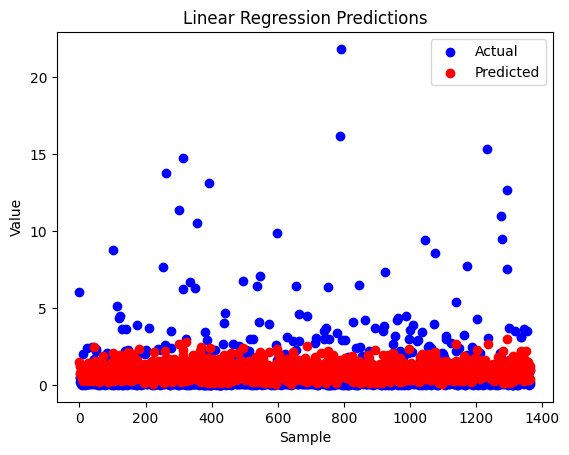

In [21]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Linear Regression Predictions')
plt.legend()

plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


rf_model = RandomForestRegressor()


random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)


random_search.fit(X, y)


best_model_dt = random_search.best_estimator_
best_params = random_search.best_params_


y_pred = best_model_dt.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = best_model_dt.score(X, y)

print("Best Parameters:", best_params)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}
Root Mean Squared Error: 1.3467227960012533
R-squared: 0.5294740756283738


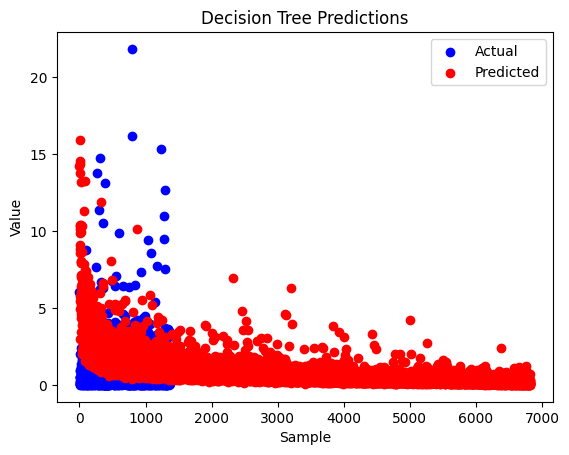

In [23]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Decision Tree Predictions')

plt.legend()

plt.show()

In [24]:
joblib.dump(best_model_lr, 'best_model.joblib')

['best_model.joblib']

In [25]:
from joblib import load
model = load("best_model.joblib")

In [26]:
df_encod
min_value = df_encod.min()

max_value = df_encod.max()

print("Minimum value:", min_value)


Minimum value: Year_of_Release       1985.00
Global_Sales             0.01
Critic_Score            13.00
Critic_Count             3.00
Platform_3DS             0.00
Platform_DC              0.00
Platform_DS              0.00
Platform_GBA             0.00
Platform_GC              0.00
Platform_PC              0.00
Platform_PS              0.00
Platform_PS2             0.00
Platform_PS3             0.00
Platform_PS4             0.00
Platform_PSP             0.00
Platform_PSV             0.00
Platform_Wii             0.00
Platform_WiiU            0.00
Platform_X360            0.00
Platform_XB              0.00
Platform_XOne            0.00
Genre_Action             0.00
Genre_Adventure          0.00
Genre_Fighting           0.00
Genre_Misc               0.00
Genre_Platform           0.00
Genre_Puzzle             0.00
Genre_Racing             0.00
Genre_Role-Playing       0.00
Genre_Shooter            0.00
Genre_Simulation         0.00
Genre_Sports             0.00
Genre_Strategy           

In [27]:
print("Maximum value:", max_value)

Maximum value: Year_of_Release       2016.00
Global_Sales            82.53
Critic_Score            98.00
Critic_Count           113.00
Platform_3DS             1.00
Platform_DC              1.00
Platform_DS              1.00
Platform_GBA             1.00
Platform_GC              1.00
Platform_PC              1.00
Platform_PS              1.00
Platform_PS2             1.00
Platform_PS3             1.00
Platform_PS4             1.00
Platform_PSP             1.00
Platform_PSV             1.00
Platform_Wii             1.00
Platform_WiiU            1.00
Platform_X360            1.00
Platform_XB              1.00
Platform_XOne            1.00
Genre_Action             1.00
Genre_Adventure          1.00
Genre_Fighting           1.00
Genre_Misc               1.00
Genre_Platform           1.00
Genre_Puzzle             1.00
Genre_Racing             1.00
Genre_Role-Playing       1.00
Genre_Shooter            1.00
Genre_Simulation         1.00
Genre_Sports             1.00
Genre_Strategy           

In [31]:
np.random.seed(42)

data = {
    'Year_of_Release': [2013],
    'Critic_Score': [70],
    'Critic_Count': [40],
    'Platform_3DS': [0],
    'Platform_DC': [0],
    'Platform_DS': [0],
    'Platform_GBA': [0],
    'Platform_GC': [0],
    'Platform_PC': [1],
    'Platform_PS': [0],
    'Platform_PS2': [0],
    'Platform_PS3': [1],
    'Platform_PS4': [0],
    'Platform_PSP': [0],
    'Platform_PSV': [0],
    'Platform_Wii': [0],
    'Platform_WiiU': [0],
    'Platform_X360': [0],
    'Platform_XB': [0],
    'Platform_XOne': [0],
    'Genre_Action': [0],
    'Genre_Adventure': [0],
    'Genre_Fighting': [0],
    'Genre_Misc': [0],
    'Genre_Platform': [1],
    'Genre_Puzzle': [0],
    'Genre_Racing': [0],
    'Genre_Role-Playing': [0],
    'Genre_Shooter': [1],
    'Genre_Simulation': [0],
    'Genre_Sports': [0],
    'Genre_Strategy': [0],
    'Rating_E': [0],
    'Rating_AO': [0],
    'Rating_E10+': [0],
    'Rating_K-A': [0],
    'Rating_M': [0],
    'Rating_RP': [0],
    'Rating_T': [1]
}


new_data = pd.DataFrame(data)


In [32]:
predictions = model.predict(new_data)
print(predictions)

[1.0986379]


c:\Users\borge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


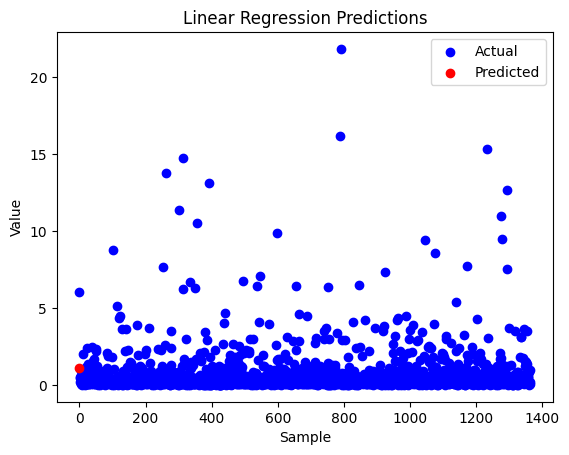

In [33]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Linear Regression Predictions')
plt.legend()

plt.show()